In [24]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

# Training inputs for RGBcolors
colors = [[0., 0., 0.], 
          [0., 0., 1.], 
          [0., 0., 0.5], 
          [0.125, 0.529, 1.0], 
          [0.33, 0.4, 0.67], 
          [0.6, 0.5, 1.0], 
          [0., 1., 0.], 
          [1., 0., 0.], 
          [0., 1., 1.], 
          [1., 0., 1.],
          [1., 1., 0.],
          [1., 1., 1.], 
          [.33, .33, .33], 
          [.5, .5, .5], 
          [.66, .66, .66]]
color_names = \
    ['black', 'blue', 'darkblue', 'skyblue', 
     'greyblue', 'lilac', 'green', 'red',
     'cyan', 'violet', 'yellow', 'white',
     'darkgrey', 'mediumgrey', 'lightgrey'
    ]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
som = MiniSom(30, 30, 3, sigma=3., learning_rate=2.5, neighborhood_function='gaussian')

## Visualising the weights

Below is a random fit, why? Because when we initialise the NN, all weights are initialised with a random number between 0 and 1.

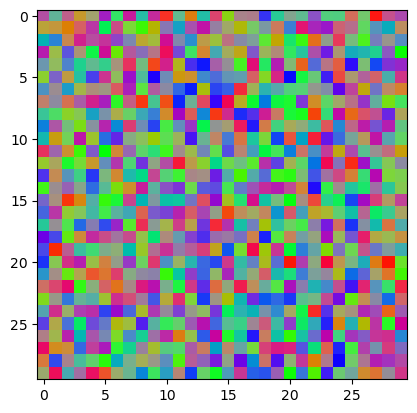

In [27]:
plt.imshow(abs(som.get_weights()), interpolation='none')

## Visualising the distance

Each neuron has a distance/position, so we can visualise this, as below:

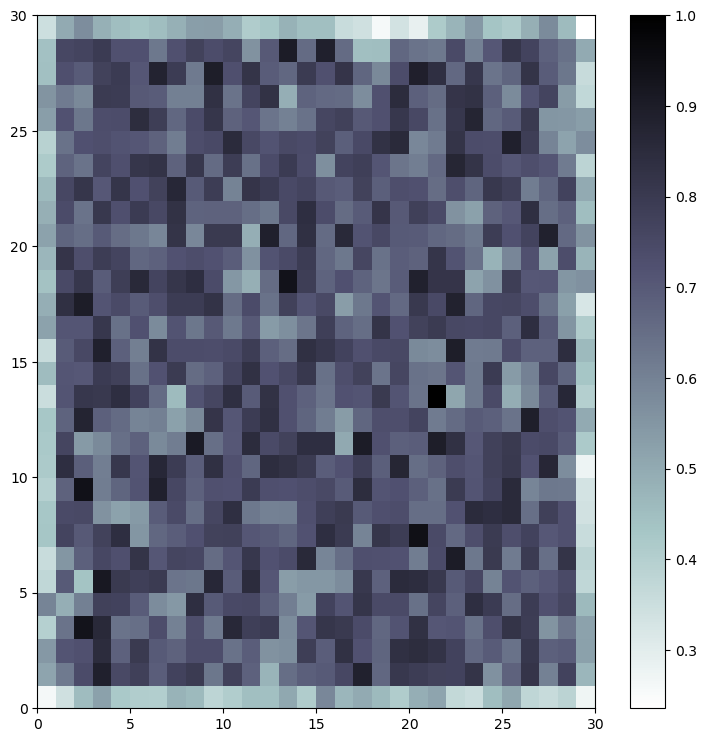

In [28]:
plt.figure(figsize=(9,9))

plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

## Train the network

In [29]:
som.train(colors, 500, random_order=True, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.276557296515772e-09


C:\Users\Bane6\anaconda3\lib\site-packages\minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


The network has not only learned respective colours, it has also sorted the colours in some two dimension representation. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


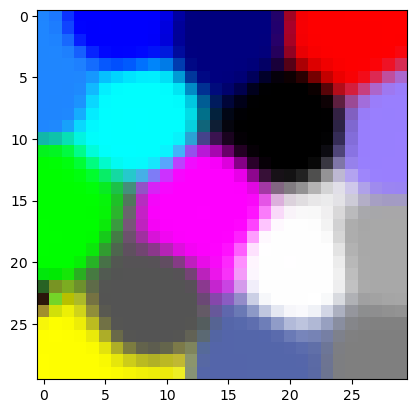

In [30]:
plt.imshow(abs(som.get_weights()), interpolation='none')

## Finding winning neuron

In [31]:
colors[3]

[0.125, 0.529, 1.0]

In [32]:
som.winner(colors[3]) # returns the indices of the winning neuron relative to the input vector

(7, 0)

In [33]:
[som.winner(d) for d in colors] # decompose into vectors

[(8, 20),
 (0, 5),
 (0, 15),
 (7, 0),
 (29, 17),
 (10, 29),
 (18, 0),
 (0, 26),
 (8, 8),
 (16, 13),
 (29, 0),
 (20, 20),
 (24, 9),
 (29, 28),
 (19, 29)]

In [36]:
w_x, w_y = zip(*[som.winner(d) for d in colors]) # decompose into vectors; zip(*iter) decomposes the iterable

In [48]:
w_x = np.array(w_x)# vector of x coordinates of winning neurons; also need to convert to np.array() to plot onto colour field
w_x

array([ 8,  0,  0,  7, 29, 10, 18,  0,  8, 16, 29, 20, 24, 29, 19],
      dtype=int64)

In [45]:
w_y = np.array(w_y) # vector of y coordinates of winning neurons
w_y

array([20,  5, 15,  0, 17, 29,  0, 26,  8, 13,  0, 20,  9, 28, 29],
      dtype=int64)

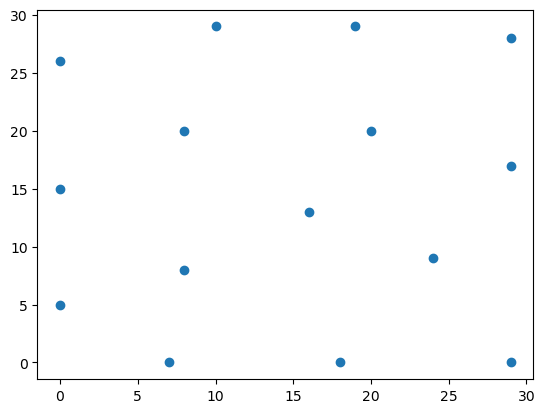

In [46]:
plt.scatter(w_x, w_y)

## Mapping the winning neuron to the colour field

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


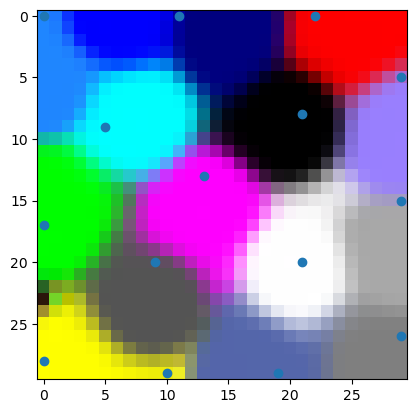

In [49]:
plt.imshow(abs(som.get_weights()), interpolation='none')
plt.scatter(29-w_x, w_y)

## Visualise the distance map

Black = large distances, White = small distances

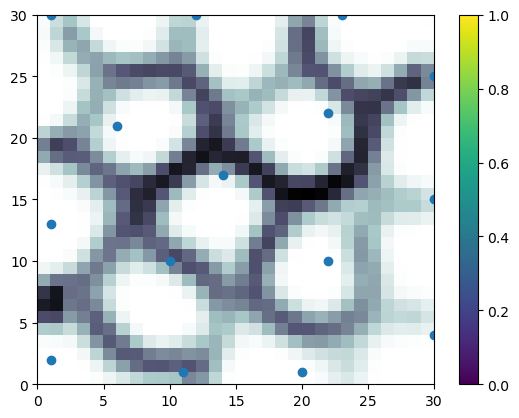

In [51]:
plt.pcolor(np.flipud(som.distance_map()), cmap="bone_r")
plt.scatter(30-w_x, 30-w_y)
plt.colorbar()